# Adiabatic Flame Temperature
This Jupyter Notebook was written by Dan Haworth. It is intended as a tutorial to be used in parallel with Chapter 2 of the book "An Introduction to Combustion: Concepts and Applications" by Stephen R. Turns and Daniel C. Haworth. That book is referred to as "Turns 4th ed." throughout this Notebook.

This Notebook was last updated 7 February 2020.

The objective of this tutorial Notebook is to introduce an approach for computing adiabatic flame temperatures using Cantera's `Solution()` object. The approach is limited to cases where the product composition is known, or can be computed using element balances (stoichiometric considerations) alone. The use of elemental mass fractions and elemental mole fractions is introduced for stoichiometry calculations. The more conventional, and general, approach for computing adiabatic flame temperatures with Cantera is to use Cantera's `equilibrate()` function. That will be introduced in a later tutorial. We will define the gas mixture using gri30.cti.

The reader should be familiar with the material in the previous Notebook (2_5_Heating_value) before working through this Notebook.

## 1. Concepts and definitions

The *adiabatic flame temperature* is the product temperature that would be reached in the combustion of a specified reactant (fuel + oxidizer) mixture at a given initial pressure and temperature, where the combustion takes places adiabatically (no heat transfer to or from the surroundings). To complete the thermodynamic specification of the combustion process, it is necessary to specify one additional constraint, which is usually either that the combustion takes place at constant pressure or at constant volume. The corresponding flame temperatures are, respectively, the *constant-pressure adiabatic flame temperature* and the *constant-volume adiabatic flame temperature*. 

In the combustion literature, the term "adiabatic flame temperature" is often used without further qualification. In that case, the term usually is taken to imply the constant-pressure adiabatic flame temperature.

In general, both the product composition and the product thermodynamic state (e.g., temperature and pressure) would need to be computed simultaneously from the given information about the reactant mixture and the combustion process. However, as we have seen, it is possible in some cases to provide a reasonable first approximation for the product composition using element balances (stoichiometric considerations) alone. That is the case for the complete combustion of a fuel-lean-to-stoichiometric reactant mixture for a fuel that contains (at most) C, H, and O atoms burning with our standard approximation for air, for example; see tutorial Notebook 2_3_Stoichiometry. Additional concepts and tools that can be used to determine the product composition will be introduced as we continue to work through Chapter 2 and subsequent chapters of Turns 4th ed. Here we confine our attention to cases where the product composition can be calculated using stoichiometric considerations alone.

## 2. Constant-pressure adiabatic flame temperature

We first consider the constant-pressure adiabatic flame temperature. This is usually what is implied by the term "adiabatic flame temperature", unless specified otherwise.

For a constant-pressure adiabatic process, the mixture enthalpy and pressure remain constant, even as the mixture composition changes. Therefore, for a given reactant (fuel + oxidizer) mixture composition at a given temperature and pressure, and for a known product composition, the problem is to find the product temperature for which the product mixture enthalpy and pressure are equal to the reactant mixture enthalpy and pressure.

As in previous tutorial Notebooks, we define a gas mixture named "gas1" using Cantera's `Solution()` object and GRI-Mech 3.0:

In [1]:
# access modules
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# report Cantera version
print("Running Cantera version: {}".format(ct.__version__))

Running Cantera version: 2.4.0


In [2]:
# define an ideal-gas mixture named "gas1" using Cantera's "Solution()" object and GRI-Mech 3.0
gas1 = ct.Solution('gri30.cti')

As a first example, we consider a stoichiometric propane-air reactant mixture:

In [3]:
# stoichiometric propane-air mixture at 300 K, 1 atm, with our usual approximation for air
# here we specify the reactant (relative) mole fractions directly
gas1.TPX = 300. , ct.one_atm , 'C3H8:1., O2:5., N2:18.8'
gas1()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.19695  kg/m^3
  mean mol. weight         29.4655  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.4014e+05       -4.129e+06     J
   internal energy     -2.2479e+05       -6.624e+06     J
           entropy          6893.9        2.031e+05     J/K
    Gibbs function     -2.2083e+06       -6.507e+07     J
 heat capacity c_p          1050.3        3.095e+04     J/K
 heat capacity c_v          768.14        2.263e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.201613         0.218947         -26.2751
                N2       0.758065         0.720709         -23.3101
              C3H8      0.0403226        0.0603447         -77.3418
     [  +50 minor]        

Or equivalently:

In [4]:
phi  = 1.0
fuel = 'C3H8'
air  = 'O2:1.0, N2:3.76'

gas1.TP = 300. , ct.one_atm
gas1.set_equivalence_ratio(phi,fuel,air)
gas1()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.19695  kg/m^3
  mean mol. weight         29.4655  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.4014e+05       -4.129e+06     J
   internal energy     -2.2479e+05       -6.624e+06     J
           entropy          6893.9        2.031e+05     J/K
    Gibbs function     -2.2083e+06       -6.507e+07     J
 heat capacity c_p          1050.3        3.095e+04     J/K
 heat capacity c_v          768.14        2.263e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.201613         0.218947         -26.2751
                N2       0.758065         0.720709         -23.3101
              C3H8      0.0403226        0.0603447         -77.3418
     [  +50 minor]        

We switch to a molar basis for now, as that is how species thermodynamic properties are tabulated in the appendices of Turns 4th ed.:

In [5]:
# report the reactant enthalpy in J/kmol
gas1.basis = 'molar'
gas1.h

-4129315.990410699

Alternatively, the reactant mixture enthalpy (J/kmol) can be computed as the sum over all species of the product of the mole fraction of each species times the species molar specific enthalpy:

In [6]:
h_reac = 0.
for i in range(gas1.n_species):
    X_i = gas1.X[i]
    h_i = gas1.partial_molar_enthalpies[i]
    h_reac += X_i*h_i
    
# report the reactant enthalpy in J/kmol
h_reac

-4129315.990410699

This confirms that the mixture enthalpy reported by Cantera is consistent with that given by the standard mixture formula.

As a first approximation of the product composition for stoichiometric and fuel-lean reactants, we assume that there is a single carbon-containing product species (CO2) and a single hydrogen-containing product species (H2O). This is *complete combustion*, in the sense discussed earlier. In that case, element balances are sufficient to determine the product composition, as we have seen. For stoichiometric propane-air reactants and complete combustion, the product composition (on the basis of one molar unit of fuel) is 3CO2 + 4H2O + 18.8N2.

In [7]:
# total number of product moles
N_prod = 3. + 4. + 18.8

# product composition, in mole fractions
X_products = {'CO2':3./N_prod , 'H2O':4./N_prod , 'N2':18.8/N_prod}
X_products

{'CO2': 0.11627906976744186,
 'H2O': 0.15503875968992248,
 'N2': 0.7286821705426356}

Rather than hard-wiring the product composition, we can let Cantera compute it for us. That can be done in various ways, one of which has been shown in earlier tutorial Notebooks. Here we show a different approach, based on elemental mass fractions and elemental mole fractions. 

As discussed in tutorial Notebook 2_1_Mass_moles_molecular_weights_mixtures, the `elemental_mass_fraction()` and `elemental_mole_fraction()` attributes report, respectively, the fraction of mass and the fraction of the atoms in the mixture that are of a particular element type, regardless of what species (molecules) the atoms are bound up in. Unlike species mass fractions and species mole fractions, the elemental mass fractions and elemental mole fractions in a mixture do not change as a result of chemical reactions. Here there are four elements in the system (neglecting argon): carbon (C), hydrogen (H), oxygen (O), and nitrogen (N):

In [8]:
# report the elemental mass fractions of C, H, O, and N in the stoichiometric propane-air reactant mixture
# note that we have not yet reset "gas1" to correspond to the products of combustion
gas1.elemental_mass_fraction('C') , gas1.elemental_mass_fraction('H') , gas1.elemental_mass_fraction('O') , \
gas1.elemental_mass_fraction('N')

(0.04931002206157182,
 0.011034672358502638,
 0.21894673409705329,
 0.7207085714828723)

Note that the elemental mass fractions sum to unity. The same is true of elemental mole fractions.

Since all reactant carbon ends up as product CO2, all reactant hydrogen ends up as product H2O, and all reactant nitrogen ends up as product N2, the product composition (expressed in terms of mole fractions) can be computed using elemental mole fractions, as follows:

In [9]:
# compute the complete combustion product mole fractions corresponding to given elemental mole fractions of carbon,
#   hydrogen, and nitrogen in the mixture

# there is one product mole of CO2 for each mole of C in the mixture, 0.5 product moles of H2O for each mole of H, and
#   0.5 product moles of N2 for each mole of N
esum = 1.0*gas1.elemental_mole_fraction('C') + 0.5*gas1.elemental_mole_fraction('H') + 0.5*gas1.elemental_mole_fraction('N')

X_products = {'CO2': 1.0*gas1.elemental_mole_fraction('C')/esum,
              'H2O': 0.5*gas1.elemental_mole_fraction('H')/esum,
              'N2' : 0.5*gas1.elemental_mole_fraction('N')/esum}

X_products

{'CO2': 0.11627906976744187,
 'H2O': 0.15503875968992248,
 'N2': 0.7286821705426356}

The result is consistent with the earlier manual calculation.

Now we set the mixture composition to the assumed product composition, without changing the mixture enthalpy and pressure. We use the [`HPX`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.HPX) attribute for that purpose. Then by definition, the resulting temperature is the constant-pressure adiabatic flame temperature.

We need to be careful with the enthapy, though. The mixture enthalpy value is given on a per-unit-mass-of-mixture basis (for `basis` = "mass") or on a per-unit-mole-of-mixture basis (for `basis` = "molar"). Currently the basis is set to "molar". The number of reactant moles is not equal to the number of product moles (moles are not conserved in the chemical reaction), while mass is conserved: the mass of the reactants is equal to the mass of the products. So one way to do this would be to return to a mass basis, as follows:

In [10]:
# set the basis back to "mass"
gas1.basis = 'mass'

# change the composition of gas1 to the product composition, 
#   while keeping the pressure and the enthalpy per unit mass of mixture the same as those for the reactants
gas1.HPX = None , None , X_products
gas1()


  gri30:

       temperature          2393.4  K
          pressure          101325  Pa
           density        0.144216  kg/m^3
  mean mol. weight         28.3234  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.4014e+05       -3.969e+06     J
   internal energy     -8.4273e+05       -2.387e+07     J
           entropy          9693.3        2.745e+05     J/K
    Gibbs function      -2.334e+07       -6.611e+08     J
 heat capacity c_p          1488.3        4.215e+04     J/K
 heat capacity c_v          1194.8        3.384e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
               H2O       0.155039        0.0986134         -42.3042
               CO2       0.116279         0.180678         -54.6399
                N2       0.728682         0.720709         -27.8688
     [  +50 minor]        

So, the constant-pressure adiabatic flame temperature for the complete combustion of stoichiometric propane-air reactants initially at 300 K and 1 atm is 2393.4 K.

An approach that more closely mimics the iterative approach that one would typically use in manual calculations with property tables would be as follows: 

* Compute the reactant mixture enthalpy for the given reactant composition, pressure, and temperature
* Keep the mixture pressure at the given initial reactant pressure, and reset the mixture composition to the known product composition
* Guess a product temperature
* Compute the product mixture enthalpy
* If the product mixture enthalpy is lower than the reactant mixture enthalpy, increase the product temperature and try again; if the product mixture enthalpy is higher than the reactant mixture enthalpy, decrease the product temperature and try again
* Iterate in this manner until the product enthalply is equal to the reactant enthalpy (to within some prescribed tolerance)

Now, let's pull this all together into a (fairly) general function that will allow us to calculate the constant-pressure adiabatic flame temperature of a stoichiometric or fuel-lean reactant mixture, assuming complete combustion. Instead of using the `elemental_mole_fraction()` attribute to do the stoichiometry, we will use the `n_atoms()` and `set_equivalence_ratio()` attributes, following what was done in tutorial Notebook 2_3_Stoichiometry.

In [11]:
# define a function that returns the constant-pressure adiabatic flame temperature for a specified fuel burning with air,
#   given the reactant temperature, pressure, and equivalence ratio
# the function takes four arguments: the fuel type, the reactants temperature, the (constant) mixture pressure, and the
#   reactants equivalence ratio
# the function returns a single value: the constant-pressure adiabatic flame temperature
# the standard approximation is used for air
# complete combustion is assumed - this is appropriate as a first approximation for stoichiometric or fuel-lean reactants
# the ideal-gas mixture "gas" must be defined on calling this function
# the specified fuel must be one that is available in "gas"
# the specified fuel must contain (at most) carbon, hydrogen, and oxygen atoms

def flame_temp_pconst_complete(fuel,treac,press,phi):

# set the mixture thermochemical state to correspond to fuel-air reactants at the specified temperature and pressure
    gas.TP = treac, press
    air    = 'O2:1.0 N2:3.76'
    gas.set_equivalence_ratio(phi, fuel, air)
    
# compute the product composition corresponding to complete combustion,
#   allowing for left-over O2 for 0<phi<1

# x, y, and z are the numbers of atoms of carbon, hydrogen, and oxygen in the fuel molecule, respectively
    x = gas.n_atoms(fuel,'C')
    y = gas.n_atoms(fuel,'H')
    z = gas.n_atoms(fuel,'O')
    
# a is the number of moles of O2 needed per mole of fuel for complete combustion
    a = x + y/4. - z/2.
    
# compute the numbers of product moles per mole of fuel, for complete combustion
# these expressions are appropriate only for phi less than or equal to unity
    N_CO2 = x
    N_H2O = y/2.
    N_O2  = ( 1./phi - 1.)*a
    N_N2  = 3.76*a / phi
    
# compute the total number of product moles per mole of fuel
    N_prod = N_CO2 + N_H2O + N_O2 + N_N2
    
# compute the product mole fractions
    X_products = {'CO2':N_CO2/N_prod , 'H2O':N_H2O/N_prod , 'O2':N_O2/N_prod , 'N2':N_N2/N_prod}

# make sure that the basis is set to "mass"
    gas.basis = 'mass'
    
# reset the mixture thermochemical state to correspond to products of complete combustion,
#   holding the enthalpy per unit mass of mixture and the pressure constant
    gas.HPX = None , None , X_products

# return the product temperature, which by definition, is the constant-pressure adiabatic flame temperature
    tprod = gas.T

    return tprod

In [12]:
# define the gas mixture "gas" using Cantera's "Solution" object and GRI-Mech 3.0
gas = ct.Solution('gri30.cti')

# confirm that the function returns the same value that was computed earlier for stoichiometric propane-air reactants
#   at 300 K and 1 atm
fuel  = 'C3H8'
treac = 300.
press = ct.one_atm
phi   = 1.0

tadiabatic = flame_temp_pconst_complete(fuel,treac,press,phi)
tadiabatic 

2393.4027397867762

The result is the same as that from the earlier calculation.

Now use the function defined above to compute and plot contant-pressure adiabatic flame temperatures as functions of equivalence ratio (for fuel-lean to stoichiometric reactants) for several fuels, where the reactants are at 300 K and 1 atm in all cases.

In [13]:
# list the fuels - all must be gas-phase species that are available in gri30.cti,
#   and all must be molecules that contain (at most) carbon, hydrogen, and oxygen atoms
# recall that you can see all 53 species available in gri30.cti using the "species_names" attribute
# here the fuels are hydrogen, methane, ethane, propane, acetylene, and methanol
fuels  = ['H2', 'CH4', 'C2H6', 'C3H8', 'C2H2', 'CH3OH']
nfuels = len(fuels)

# specify the reactant temperature and pressure
treac = 300.
press = ct.one_atm

# specify the range of equivalence ratios and the equivalence ratio increment for plotting
# in practice, equivalence ratios as low as 0.3 may not be relevant for many fuels, as
#   the mixture would be too lean to support combustion - we will discuss flammability limits later
phi_min = 0.3
phi_max = 1.001
phi_inc = 0.1
phis    = np.arange(phi_min,phi_max,phi_inc)
nphis   = len(phis)

nfuels , nphis , phis

(6, 8, array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [14]:
# note the use of a 2D array to hold the computed adiabatic flame temperatures for all fuels and all equivalence ratios
tads = np.zeros(shape=(nfuels,nphis))

In [15]:
# compute the constant-pressure adiabatic flame temperature for each fuel for each equivalence ratio

for i , fuel in enumerate(fuels):    # loop over fuels
    for j , phi in enumerate(phis):  # loop over equivalence ratios for each fuel     
# compute the constant-pressure adiabatic flame temperature for fuel i at equivalence ratio j
        tads[i,j] = flame_temp_pconst_complete(fuel,treac,press,phi)

# print the array of constant-pressure adiabatic flame temperatures
tads

array([[1189.37292686, 1428.51196883, 1647.49917039, 1849.14189324,
        2035.64389419, 2208.80358533, 2370.12207863, 2520.86914592],
       [1066.38887452, 1281.46475478, 1482.27203576, 1670.75073232,
        1848.37929869, 2016.33232387, 2175.57220803, 2326.90561112],
       [1081.19012068, 1301.31265109, 1507.36067041, 1701.29040907,
        1884.57723666, 2058.3813399 , 2223.64446232, 2381.14962926],
       [1083.33089999, 1304.47226987, 1511.69576029, 1706.95171859,
        1891.70590416, 2067.10656886, 2234.0823287 , 2393.40273979],
       [1256.90661633, 1528.8760004 , 1785.84692542, 2030.25909434,
        2263.83066858, 2487.82450575, 2703.20296262, 2910.7235966 ],
       [1123.42865589, 1341.99307897, 1541.28394296, 1724.19758665,
        1892.95834666, 2049.33772242, 2194.78313398, 2330.49937743]])

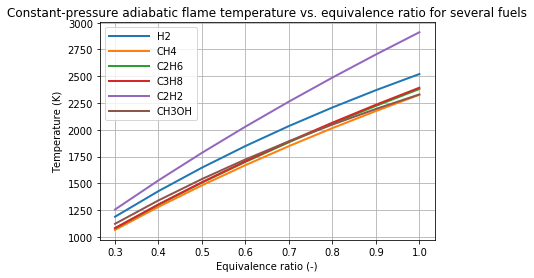

In [16]:
# plot the constant-pressure adiabatic flame temperatures for all fuels in a single figure
fig, ax = plt.subplots()
for i , fuel in enumerate(fuels):
    ax.plot(phis , tads[i,:], label=fuel, lw=2)
    
ax.set(xlabel='Equivalence ratio (-)',
       ylabel='Temperature (K)',
       title ='Constant-pressure adiabatic flame temperature vs. equivalence ratio for several fuels')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Tad_pconst_6fuels.pdf")

The constant-pressure adiabatic flame temperature decreases with decreasing equivalence ratio, as expected. This is mainly a consequence of the energy needed to raise the temperature of the nitrogen and the leftover oxygen (which do not participate chemically) from the reactant temperature to the product temperature; the amounts of nitrogen and leftover oxygen increase with decreasing equivalence ratio.

The flame temperatures for C2H2 and for H2 are higher than those for the other fuels, and those for the other fuels are within 50-100 K of each other for all values of the equivalence ratio. For stoichiometric reactants at ambient pressure and temperature, the complete-combustion adiabatic flame temperature for most hydrocarbon fuels burning with air is approximately 2300 K.

## 3. Constant-volume adiabatic flame temperature

We next consider the constant-volume adiabatic flame temperature. For a constant-volume adiabatic process, the mixture internal energy and volume remain constant, even as the composition of the mixture changes. Therefore, for a given reactant (fuel + oxidizer) mixture composition at a given initial temperature and pressure, and for a known product composition, the problem is to find the product temperature for which the product mixture internal energy and volume are equal to the reactant mixture internal energy and volume. For constant-volume combustion, the product pressure is higher than the reactant pressure, in general.

For this case, we will not repeat all of the details, and will go directly to defining an appropriate function and exercising that function for several different fuels. We will also look at the product pressure, in addition to the product temperature.

In [17]:
# define a function that returns the constant-volume adiabatic flame temperature and product pressure 
#   for a specified fuel burning with air, given the reactant temperature, pressure, and equivalence ratio
# the function takes four arguments: the fuel type, the reactants temperature, the reactants pressure, and the
#   reactants equivalence ratio
# the function returns two values: the constant-volume adiabatic flame temperature, and the products mixture pressure
# the standard approximation is used for air
# complete combustion is assumed - this is appropriate as a first approximation for stoichiometric or fuel-lean reactants
# the ideal-gas mixture "gas" must be defined on calling this function
# the specified fuel must be one that is available in "gas"
# the specified fuel must contain (at most) carbon, hydrogen, and oxygen atoms

def flame_temp_vconst_complete(fuel,treac,press,phi):

    gas.TP = treac, press
    air    = 'O2:1.0 N2:3.76'
    gas.set_equivalence_ratio(phi, fuel, air)
     
    x = gas.n_atoms(fuel,'C')
    y = gas.n_atoms(fuel,'H')
    z = gas.n_atoms(fuel,'O')
    
    a = x + y/4. - z/2.
    
    N_CO2 = x
    N_H2O = y/2.
    N_O2  = ( 1./phi - 1.)*a
    N_N2  = 3.76*a / phi
    
    N_prod = N_CO2 + N_H2O + N_O2 + N_N2
    
    X_products = {'CO2': N_CO2/N_prod , 'H2O': N_H2O/N_prod , 'O2': N_O2/N_prod , 'N2':N_N2/N_prod}

    gas.basis = 'mass'
    
# here is the key difference with respect to the constant-pressure case
# we hold the internal energy per unit mass of mixture and the mixture volume to be the same as those for the reactants
#   (instead of enthalpy and pressure, as was appropriate for the constant-pressure adiabatic flame temperature)
    gas.UVX = None , None , X_products

# return the product temperature and pressure
    tprod = gas.T
    pprod = gas.P

    return tprod, pprod

In [18]:
# define the gas mixture
gas = ct.Solution('gri30.cti')

# define the fuels
fuels  = ['H2', 'CH4', 'C2H6', 'C3H8', 'C2H2', 'CH3OH']
nfuels = len(fuels)

# specify the reactants temperature and pressure
treac = 300.
press = ct.one_atm

# define the equivalence ratios at which the constant-volume adiabatic flame temperatures are to be computed
phi_min = 0.3
phi_max = 1.001
phi_inc = 0.1
phis    = np.arange(phi_min,phi_max,phi_inc)
nphis   = len(phis)

# define and initialize arrays for the constant-volume adiabatic flame temperature and the product mixture pressure
tads = np.zeros(shape=(nfuels,nphis))
pads = np.zeros(shape=(nfuels,nphis))

# compute the constant-volume adiabatic flame temperature and the product pressure for each fuel,
#   as a function of equivalence ratio
for i , fuel in enumerate(fuels):
    for j , phi in enumerate(phis):
        tads[i,j], pads[i,j] = flame_temp_vconst_complete(fuel,treac,press,phi)

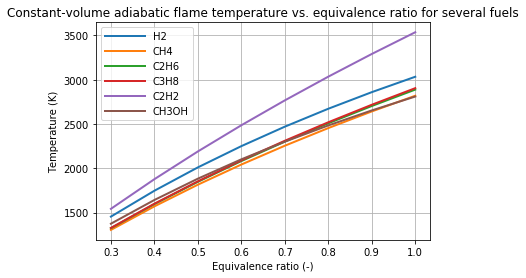

In [19]:
# plot the constant-volume adiabatic flame temperatures as functions of equivalence ratio
fig, ax = plt.subplots()
for i , fuel in enumerate(fuels):
    ax.plot(phis , tads[i,:], label=fuel, lw=2)
    
ax.set(xlabel='Equivalence ratio (-)',
       ylabel='Temperature (K)',
       title ='Constant-volume adiabatic flame temperature vs. equivalence ratio for several fuels')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Tad_vconst_6fuels.pdf")

The general trends are similar to those observed earlier for the constant-pressure adiabatic flame temperature. 

For the same reactant mixture composition, pressure, and temperature, the constant-volume adiabatic temperature is higher than the constant-pressure adiabatic flame temperature. For the constant-pressure case, part of the chemical energy goes toward doing expansion work on the surroundings as the volume increases, rather than toward raising the temperature. We could have looked at how the volume changed from the reactant mixture to the product mixture for the constant-pressure case earlier.

The computed constant-volume adiabatic flame temperatures for H2 and for C2H2 exceed 3000 K (the maximum temperature for which the thermodynamic property data in gri30.cti are intended to be used) for some values of the equivalence ratio.

Now let's look at the product pressures:

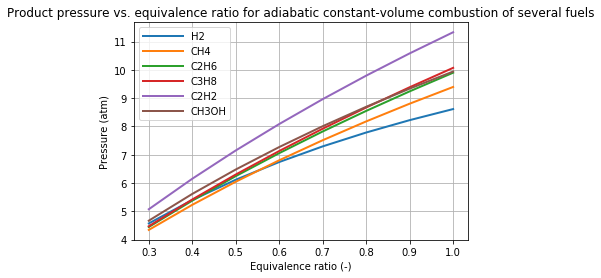

In [20]:
# plot the product pressure results for constant-volume adiabatic combustion
fig, ax = plt.subplots()
for i , fuel in enumerate(fuels):
    ax.plot(phis , pads[i,:]/ct.one_atm, label=fuel, lw=2) # note that the pressure is converted to atm
    
ax.set(xlabel='Equivalence ratio (-)',
       ylabel='Pressure (atm)',
       title ='Product pressure vs. equivalence ratio for adiabatic constant-volume combustion of several fuels')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("pad_vconst_6fuels.pdf")

The product pressure is higher than the reactant pressure (1 atm), in all cases. The smallest pressure increase is for H2 fuel, and the highest is for C2H2.

We also could have plotted the increase in volume for the constant-pressure case earlier.

## 4. More general cases

Adiabatic flame temperatures for pure oxygen (O2) oxidizer are higher than those for air oxidizer. The difference is due to the energy required to raise the temperature of the N2 in the air (which does not participate chemically, at the current level of approximation) from the reactant temperature to the product temperature, in the case of air oxidizer.

In principle, one could define a flame temperature corresponding to a combustion process where any two mixture thermodynamic propertes are held constant during the conversion from reactants to products.

In general, the product composition would not be known, and must be found as part of the solution. We will deal with cases where the product composition must be found along with the product temperature, in subsequent tutorials.

Finally, one could allow for heat losses (nonadiabatic processes), if information about heat losses were provided. We will deal with such cases after we add an energy equation to our toolkit (Chapter 6 of Turns 4th ed.).